In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


## We will try various classification algorithms

We will try the following:
* Naive Bayes
* Linear SVM

We mention that in this docuemnt we take the best options that we have found, after exploring the hyperparameter space for each algorithm in its own separate Notebook.

In [45]:
from lib import processing

data = processing.process_data(df)
evaluations = {}


Using a total of 14640 tweets


In [133]:
from sklearn.metrics import confusion_matrix
from lib import classify
from nltk.sentiment import SentimentAnalyzer
import matplotlib.patheffects as path_effects

sentim_analyzer = SentimentAnalyzer()

classify.add_features(data, sentim_analyzer, min_freq = 20)
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, text = False, colorize = False, fontweight = "normal"):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ['negative', 'neutral', 'positive'], rotation=45)
    plt.yticks(tick_marks, ['negative', 'neutral', 'positive'])
    if text:
        for i, row in enumerate(cm):
            for j, value in enumerate(row):
                color = "black"
                if colorize:
                    if i == j:
                        if value > 0:
                            color = "green"
                        else:
                            color = "red"
                    else:
                        if value > 0 :
                            color = "red"
                        else:
                            color = "green"
                t = plt.text(j - .4, i , "{0}%".format(round(value * 100, 2)), fontsize = 14, color = color, fontweight=fontweight)
                t.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),path_effects.Normal()])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
        
def evaluate_trainer(trainer):
    e = classify.train_model(data, sentim_analyzer, trainer, cm = True)
    evaluations[trainer['name']] = pandas.DataFrame(e)

def get_normalized_cm(cm):
    aux = cm.mean()
    aux_y = cm.mean().sum(axis = 1)
    for i in range(len(aux)):
        aux[i] = aux[i] / aux_y[i]
    return aux
    
def plot_trainer(trainer):
    name = trainer['name']
    e = evaluations[name]
    plt.title("{0} Accuracy".format(name))
    e['Accuracy'].plot.box()
    plt.title("{0} Precision".format(name))
    e[['Precision [negative]', 'Precision [neutral]', 'Precision [positive]']].plot.box(figsize = (12, 4))
    plt.title("{0} Recall".format(name))
    e[['Recall [negative]', 'Recall [neutral]', 'Recall [positive]']].plot.box(figsize = (12, 4))
    plt.figure(4)
    plot_confusion_matrix(e['cm'].mean())
    plt.figure(5)
    plot_confusion_matrix(get_normalized_cm(e['cm']), title = "Normalized confusion Matrix", cmap=plt.cm.Greens, text = True)

Unigram features 1332
Bigram features:  1385


## Naive Bayes

In [48]:
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB

bayes_trainer = {
    'name': 'Naive Bayes Classifier',
    'train': SklearnClassifier(BernoulliNB(
        fit_prior = True,
        alpha = 1)).train
}
evaluate_trainer(bayes_trainer)


Training: Naive Bayes Classifier
Sampled 14640 elements
	Training fold 1
Training classifier
	Evaluating fold 1
Evaluating SklearnClassifier results...
	Training fold 2
Training classifier
	Evaluating fold 2
Evaluating SklearnClassifier results...
	Training fold 3
Training classifier
	Evaluating fold 3
Evaluating SklearnClassifier results...
	Training fold 4
Training classifier
	Evaluating fold 4
Evaluating SklearnClassifier results...
	Training fold 5
Training classifier
	Evaluating fold 5
Evaluating SklearnClassifier results...
	Training fold 6
Training classifier
	Evaluating fold 6
Evaluating SklearnClassifier results...
	Training fold 7
Training classifier
	Evaluating fold 7
Evaluating SklearnClassifier results...
	Training fold 8
Training classifier
	Evaluating fold 8
Evaluating SklearnClassifier results...
	Training fold 9
Training classifier
	Evaluating fold 9
Evaluating SklearnClassifier results...
	Training fold 10
Training classifier
	Evaluating fold 10
Evaluating SklearnClas

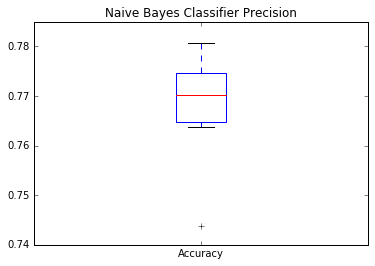

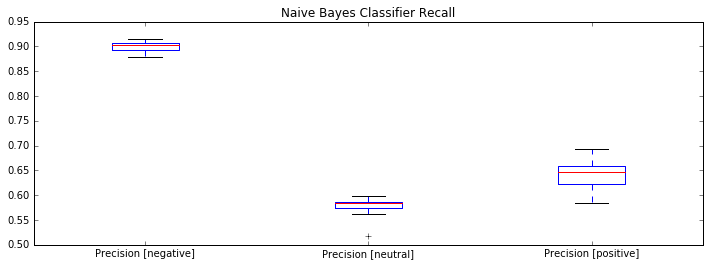

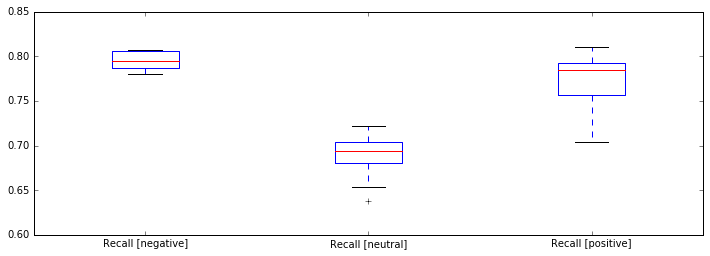

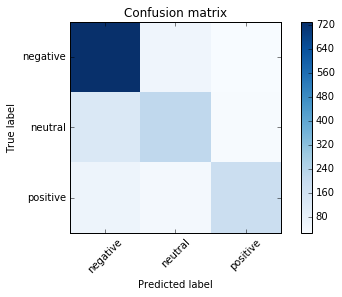

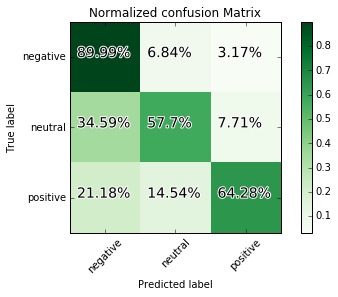

In [135]:
plot_trainer(bayes_trainer)

## SVM

In [79]:
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
svm_trainer = {
    "name": "Linear SVC Classifier",
    "train": SklearnClassifier(LinearSVC(dual = False, # because number of samples > number of features,
                                         C = 0.25,
                                        )).train,
}
evaluate_trainer(svm_trainer)

Training: Linear SVC Classifier
Sampled 14640 elements
	Training fold 1
Training classifier
	Evaluating fold 1
Evaluating SklearnClassifier results...
	Training fold 2
Training classifier
	Evaluating fold 2
Evaluating SklearnClassifier results...
	Training fold 3
Training classifier
	Evaluating fold 3
Evaluating SklearnClassifier results...
	Training fold 4
Training classifier
	Evaluating fold 4
Evaluating SklearnClassifier results...
	Training fold 5
Training classifier
	Evaluating fold 5
Evaluating SklearnClassifier results...
	Training fold 6
Training classifier
	Evaluating fold 6
Evaluating SklearnClassifier results...
	Training fold 7
Training classifier
	Evaluating fold 7
Evaluating SklearnClassifier results...
	Training fold 8
Training classifier
	Evaluating fold 8
Evaluating SklearnClassifier results...
	Training fold 9
Training classifier
	Evaluating fold 9
Evaluating SklearnClassifier results...
	Training fold 10
Training classifier
	Evaluating fold 10
Evaluating SklearnClass

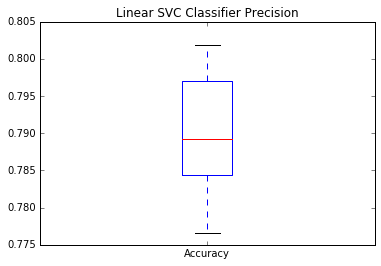

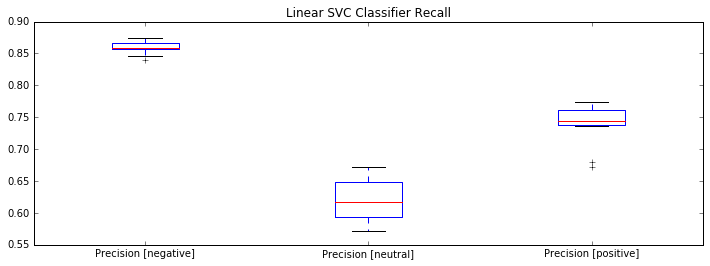

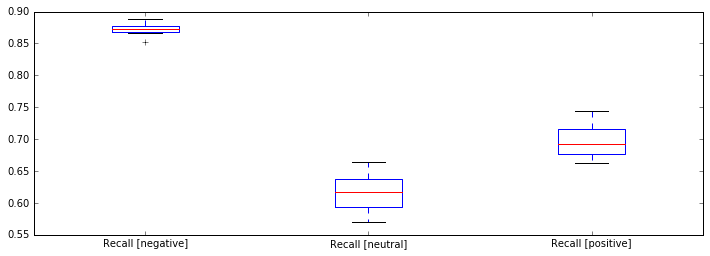

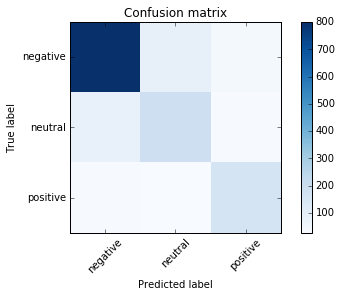

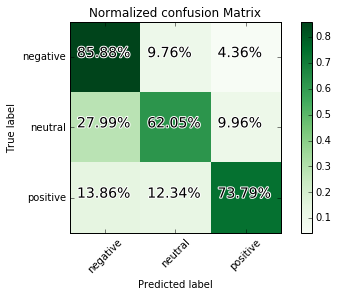

In [136]:
plot_trainer(svm_trainer)

## SVM vs NaiveBayes

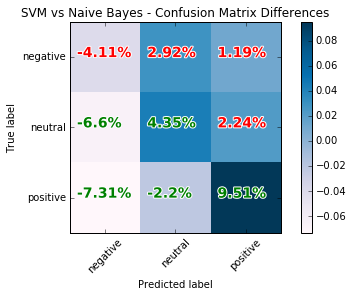

In [134]:
e_bayes = evaluations[bayes_trainer['name']]
bayes_cm = get_normalized_cm(e_bayes['cm'])
e_svm = evaluations[svm_trainer['name']]
svm_cm = get_normalized_cm(e_svm['cm'])
plot_confusion_matrix(svm_cm - bayes_cm, text = True, cmap = plt.cm.PuBu, colorize = True, fontweight="bold")
plt.title("SVM vs Naive Bayes - Confusion Matrix Differences")